In [159]:
import matplotlib.pyplot as plt
import random
from itertools import combinations
import numpy as np

Prerequisite

In [160]:
li = list(zip(range(0, 51), range(0, 51)))
print(li[0])
print(li[-1])

(0, 0)
(50, 50)


In [161]:
# Unzip a Sequence
x, y = zip(*li)

print(x)
print(y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)


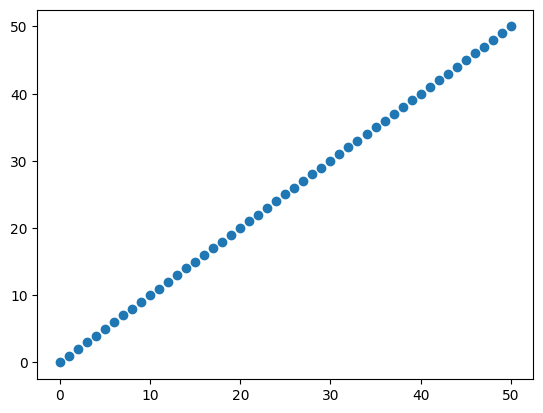

In [162]:
plt.scatter(x, y)
# or plt.scatter(*zip(*li))

In [163]:
letters ="GeEK"
 
# size of combination is set to 3
a = combinations(letters, 2)
print(a)

y = [' '.join(i) for i in a]
 
print(y)

['G e', 'G E', 'G K', 'e E', 'e K', 'E K']


Start from here

Randomly find 4 points within the range, the last point is the hub

In [164]:
max_range = 50
min_range = 2
num_dest = 3
points = []
for i in range(num_dest+1):
    points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
print(points)

[(30, 14), (32, 47), (18, 3), (11, 39)]


In [165]:
def generate_points(num_dest, min_range, max_range):
    points = []
    for i in range(num_dest+1):
        points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
    return points

In [166]:
x, y = zip(*points)
print(x)
print(y)

(30, 32, 18, 11)
(14, 47, 3, 39)


In [167]:
def find_x_y_coord(points):
    return zip(*points)

In [168]:
d = ['1', '2']
d.append('b')
d

['1', '2', 'b']

Plot it and differentiate the destinations from the hub

(0.0, 52.0)

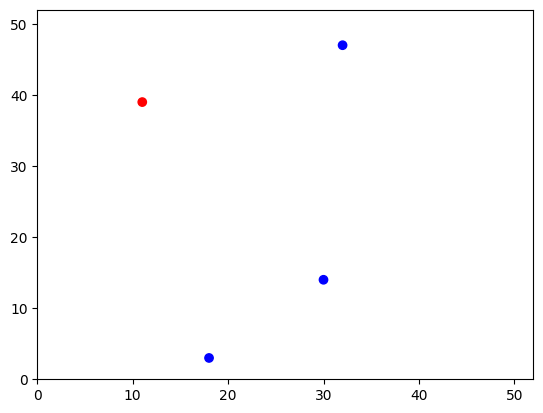

In [169]:
color = ['b' for i in range(num_dest)] # destinations
color.append('red') # hub

plt.scatter(x = x, y = y, c = color)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Draw all possible paths

(0.0, 52.0)

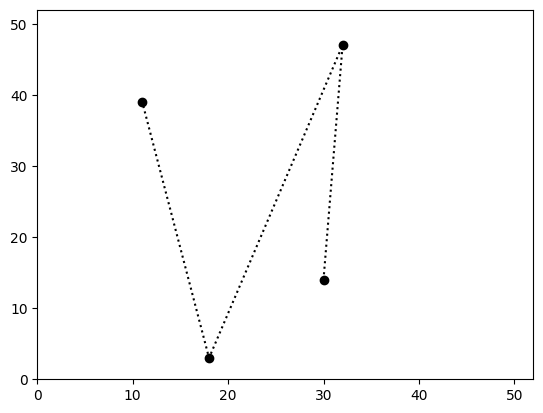

In [170]:
# [WRONG] 
plt.plot(list(x), list(y), linestyle=':',color='black',marker='o')
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

In [171]:
# [CORRECT] 
a = combinations(points, 2)
points_combination = [i for i in a]
points_combination

[((30, 14), (32, 47)),
 ((30, 14), (18, 3)),
 ((30, 14), (11, 39)),
 ((32, 47), (18, 3)),
 ((32, 47), (11, 39)),
 ((18, 3), (11, 39))]

In [183]:
def find_all_paths(points):
    a = combinations(points, 2)
    return [i for i in a]

(0.0, 52.0)

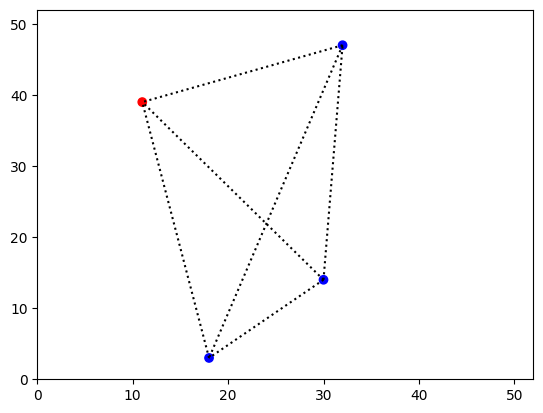

In [172]:
for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None)

# color points
plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Calculate the distances of all possible paths

In [173]:
x

(30, 32, 18, 11)

In [174]:
y

(14, 47, 3, 39)

In [175]:
points

[(30, 14), (32, 47), (18, 3), (11, 39)]

In [176]:
points_combination

[((30, 14), (32, 47)),
 ((30, 14), (18, 3)),
 ((30, 14), (11, 39)),
 ((32, 47), (18, 3)),
 ((32, 47), (11, 39)),
 ((18, 3), (11, 39))]

In [177]:
def cal_dist(start, dest):
    return round(np.linalg.norm(np.array(start) - np.array(dest)), 1)

In [178]:
points_comb_dist = []
for i in points_combination:
    point_a = i[0]
    point_b = i[1]
    dist = cal_dist(point_a, point_b)
    points_comb_dist.append(dist)
print(points_comb_dist)

[33.1, 16.3, 31.4, 46.2, 22.5, 36.7]


Plot the distance values next to the lines

In [181]:
def make_graph(ax, paths, point_x_coord, point_y_coord, num_dest, type, x_max, y_max, x_min = 0, y_min = 0):
    
    for path in paths:
        x_to_x, y_to_y = zip(*path)
        ax.plot(list(x_to_x), list(y_to_y), linestyle=':',color='black',marker=None, linewidth=0.8)

        point_a = np.array(path[0])
        point_b = np.array(path[1])
        dist = cal_dist(point_a, point_b)

        loc_mid_line = (sum(x_to_x)/2, sum(y_to_y)/2)
        ax.text(loc_mid_line[0]-1, loc_mid_line[1], str(dist), ha = 'center')

    color = ['b' for i in range(num_dest)] # destinations
    color.append('red') # hub
        
    ax.scatter(x = point_x_coord, y = point_y_coord, c = color, alpha=1.0)
    ax.set_xlim([x_min, x_max+2])
    ax.set_ylim([y_min, y_max+2])

    if type == 'all':
        ax.set_title('All Possible Paths')
    elif type == 'best':
        ax.set_tile('The Best Route')


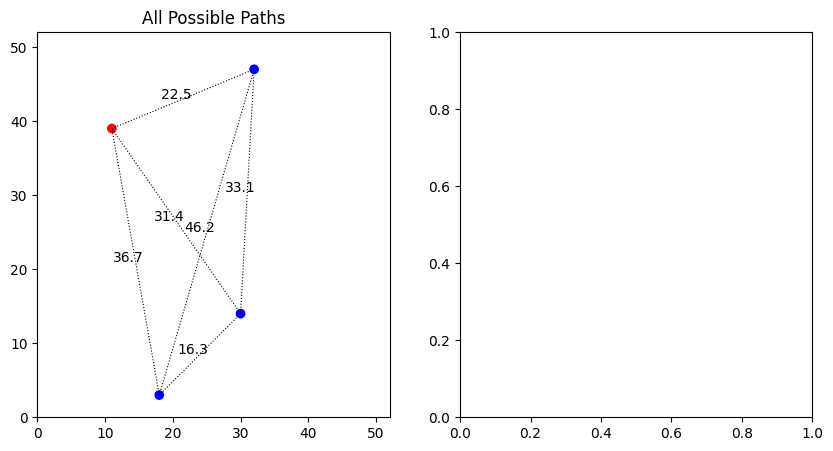

In [182]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

make_graph(ax[0], points_combination, point_x_coord = x, point_y_coord = y, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest, type = 'all')

For only 3 destinations with 1 vehicle, it is probably easy to spot the shortest route by manual examining. 

How to pragmatically find the shortest route, even though there are 50 destinations? (step 1) and more than 1 vehicle? (step 2)

In [23]:
points

[(27, 22), (25, 50), (5, 45), (18, 25)]

In [68]:
starting = points[-1]
destinations = points[:-1]
print(starting)
print(destinations)

(18, 25)
[(27, 22), (25, 50), (5, 45)]


In [141]:
def find_next_dest(origin, destinations):
    all_paths = [(idx, cal_dist(origin, v)) for idx, v in enumerate(destinations)]
    shortest_path_values = min(all_paths)
    shortest_path_idx = shortest_path_values[0]
    shortest_path = shortest_path_values[1]
    selected_dest = destinations[shortest_path_idx]
    return selected_dest, shortest_path

In [142]:
def find_best_route(points):
    starting = points[-1]
    destinations = points[:-1]

    i = len(destinations)
    total_dist = 0
    route = [starting]
    origin = starting

    while len(destinations) > 0 or i < 0:
        selected_dest, shortest_path = find_next_dest(origin, destinations)
        total_dist += shortest_path
        # add to the final route list
        route.append(selected_dest)
        # remove this round's destination from the unused destination list
        destinations.remove(selected_dest)
        # this round's destination becomes next round's original point
        origin = selected_dest
        i -= 1

    # lastly, the last destination needs to go back to the very starting point
    route.append(starting)
    total_dist += cal_dist(selected_dest, starting)
    
    return route, total_dist

In [151]:
route, total_dist = find_best_route(points)

In [152]:
total_dist

159.8

Graph the route

In [106]:
route

[(18, 25), (27, 22), (25, 50), (5, 45), (18, 25)]

In [111]:
def route_to_path(route):
    return [(route[i], route[i+1]) for i in range(0, len(route)-1)]

In [124]:
route_3_dest = route_to_path(route)
route_3_dest

[((18, 25), (27, 22)),
 ((27, 22), (25, 50)),
 ((25, 50), (5, 45)),
 ((5, 45), (18, 25))]

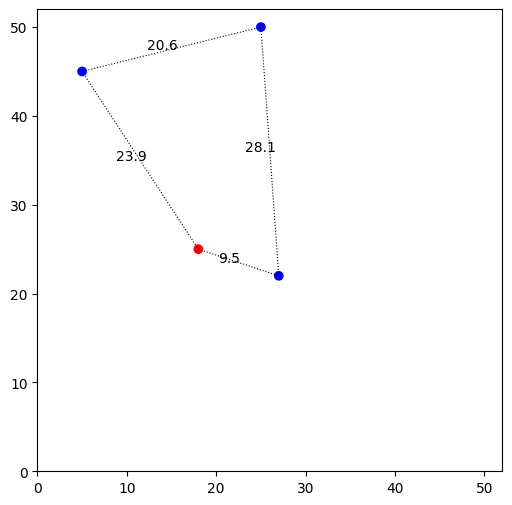

In [125]:
make_graph(route_3_dest, point_x_coord = x, point_y_coord = y, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest)

Test a few more rounds

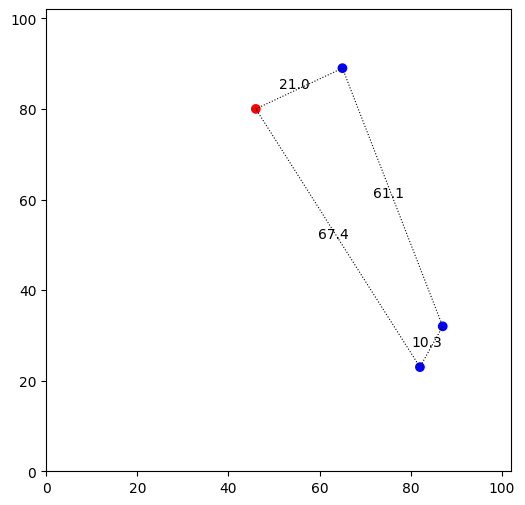

In [149]:
max_range = 100
num_dest = 3

points = generate_points(num_dest = num_dest, min_range = 0, max_range = max_range)

point_x_coord, point_y_coord = find_x_y_coord(points)

route, total_dist = find_best_route(points)

route_3_dest = route_to_path(route)

# plot
fig, ax = plt.subplots(1, 2)

# all possible paths
make_graph(ax[0], find_all_paths(points), point_x_coord, point_y_coord, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest, type = 'all')

# the best route
make_graph(ax[1], route_3_dest, point_x_coord, point_y_coord, 
           x_max = max_range, x_min = 0, 
           y_max = max_range, y_min = 0, 
           num_dest = num_dest, type = 'best')

Above program is only 1 iteration, can't guarantee the first iteration returns the best route. Take 4 destinations as example